In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Show all different types of values in the 'sex' column

In [4]:
unique_classes = df['sex'].unique()
unique_classes

array(['male', 'female'], dtype=object)

In [5]:
df['gender_male'] = df['sex'].map({'male': 1, 'female': 0})

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender_male
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [7]:
df.drop(columns = 'sex', inplace = True)

In [8]:
df.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,gender_male
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


### Show all different types of values in the 'alone' column

In [9]:
unique_classes = df['alone'].unique()
unique_classes

array([False,  True])

In [10]:
# Perform one-hot encoding using pandas get_dummies function
titanic_encoded = pd.get_dummies(df, columns=['alone'], prefix='alone')

In [11]:
titanic_encoded.drop(columns = 'alone_False', inplace = True)

In [12]:
titanic_encoded.sample(10)

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,gender_male,alone_True
537,1,1,30.0,0,0,106.4250,C,First,woman,False,NaN,Cherbourg,yes,0,True
528,0,3,39.0,0,0,7.9250,S,Third,man,True,NaN,Southampton,no,1,True
473,1,2,23.0,0,0,13.7917,C,Second,woman,False,D,Cherbourg,yes,0,True
619,0,2,26.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,1,True
39,1,3,14.0,1,0,11.2417,C,Third,child,False,NaN,Cherbourg,yes,0,False
242,0,2,29.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,1,True
489,1,3,9.0,1,1,15.9000,S,Third,child,False,NaN,Southampton,yes,1,False
103,0,3,33.0,0,0,8.6542,S,Third,man,True,NaN,Southampton,no,1,True
253,0,3,30.0,1,0,16.1000,S,Third,man,True,NaN,Southampton,no,1,False
165,1,3,9.0,0,2,20.5250,S,Third,child,False,NaN,Southampton,yes,1,False


In [13]:
# Encode 'class' column
from sklearn.preprocessing import LabelEncoder

### Show all different types of values in the 'class' column

In [14]:
unique_classes = df['class'].unique()
unique_classes

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [15]:
# Create LabelEncoder instance
label_encoder = LabelEncoder()

# Fit LabelEncoder and transform 'class' column
titanic_encoded['class_encoded'] = label_encoder.fit_transform(titanic_encoded['class']) + 1

# Display the first few rows to verify
titanic_encoded.head()

,survived,pclass,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,gender_male,alone_True,class_encoded
0,0,3,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,1,False,3
1,1,1,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,0,False,1
2,1,3,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,0,True,3
3,1,1,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,0,False,1
4,0,3,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,1,True,3


In [16]:
titanic_encoded.drop(columns = 'class', inplace =  True)

In [17]:
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,gender_male,alone_True,class_encoded
0,0,3,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,1,False,3
1,1,1,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,0,False,1
2,1,3,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,0,True,3
3,1,1,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,0,False,1
4,0,3,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,1,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,man,True,NaN,Southampton,no,1,True,2
887,1,1,19.0,0,0,30.0000,S,woman,False,B,Southampton,yes,0,True,1
888,0,3,NaN,1,2,23.4500,S,woman,False,NaN,Southampton,no,0,False,3
889,1,1,26.0,0,0,30.0000,C,man,True,C,Cherbourg,yes,1,True,1


### Show all different types of values in the 'class' column

In [18]:
unique_classes = titanic_encoded['embarked'].unique()
unique_classes

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
unique_classes = titanic_encoded['embark_town'].unique()
unique_classes

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [20]:
# Count NaN values in each column
nan_counts = titanic_encoded['embark_town'].isna().sum()
nan_counts

2

In [21]:
# Count NaN values in each column
nan_counts = titanic_encoded['embarked'].isna().sum()
nan_counts

2

### Since we can sacrifice two rows out of 891 rows, so we drop those two rows

In [22]:
titanic_encoded = titanic_encoded.dropna(subset = 'embarked')
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,gender_male,alone_True,class_encoded
0,0,3,22.0,1,0,7.2500,S,man,True,NaN,Southampton,no,1,False,3
1,1,1,38.0,1,0,71.2833,C,woman,False,C,Cherbourg,yes,0,False,1
2,1,3,26.0,0,0,7.9250,S,woman,False,NaN,Southampton,yes,0,True,3
3,1,1,35.0,1,0,53.1000,S,woman,False,C,Southampton,yes,0,False,1
4,0,3,35.0,0,0,8.0500,S,man,True,NaN,Southampton,no,1,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,man,True,NaN,Southampton,no,1,True,2
887,1,1,19.0,0,0,30.0000,S,woman,False,B,Southampton,yes,0,True,1
888,0,3,NaN,1,2,23.4500,S,woman,False,NaN,Southampton,no,0,False,3
889,1,1,26.0,0,0,30.0000,C,man,True,C,Cherbourg,yes,1,True,1


In [23]:
# One Hot Encoding of 'embarked' column

# Perform one hot encoding using get_dummies()
titanic_encoded = pd.get_dummies(titanic_encoded, columns=['embarked'])
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,embark_town,alive,gender_male,alone_True,class_encoded,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,True,NaN,Southampton,no,1,False,3,False,False,True
1,1,1,38.0,1,0,71.2833,woman,False,C,Cherbourg,yes,0,False,1,True,False,False
2,1,3,26.0,0,0,7.9250,woman,False,NaN,Southampton,yes,0,True,3,False,False,True
3,1,1,35.0,1,0,53.1000,woman,False,C,Southampton,yes,0,False,1,False,False,True
4,0,3,35.0,0,0,8.0500,man,True,NaN,Southampton,no,1,True,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,True,NaN,Southampton,no,1,True,2,False,False,True
887,1,1,19.0,0,0,30.0000,woman,False,B,Southampton,yes,0,True,1,False,False,True
888,0,3,NaN,1,2,23.4500,woman,False,NaN,Southampton,no,0,False,3,False,False,True
889,1,1,26.0,0,0,30.0000,man,True,C,Cherbourg,yes,1,True,1,True,False,False


In [24]:
titanic_encoded.drop(columns = ['embark_town'], inplace = True)
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,who,adult_male,deck,alive,gender_male,alone_True,class_encoded,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,True,NaN,no,1,False,3,False,False,True
1,1,1,38.0,1,0,71.2833,woman,False,C,yes,0,False,1,True,False,False
2,1,3,26.0,0,0,7.9250,woman,False,NaN,yes,0,True,3,False,False,True
3,1,1,35.0,1,0,53.1000,woman,False,C,yes,0,False,1,False,False,True
4,0,3,35.0,0,0,8.0500,man,True,NaN,no,1,True,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,True,NaN,no,1,True,2,False,False,True
887,1,1,19.0,0,0,30.0000,woman,False,B,yes,0,True,1,False,False,True
888,0,3,NaN,1,2,23.4500,woman,False,NaN,no,0,False,3,False,False,True
889,1,1,26.0,0,0,30.0000,man,True,C,yes,1,True,1,True,False,False


In [25]:
# Count NaN values in each column
nan_counts = titanic_encoded['deck'].isna().sum()
nan_counts

688

#### Since there are 688 out of 889 rows as nan, we can drop this column 'deck'

In [26]:
titanic_encoded.drop(columns = 'deck', inplace = True)

In [27]:
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,gender_male,alone_True,class_encoded,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,True,no,1,False,3,False,False,True
1,1,1,38.0,1,0,71.2833,woman,False,yes,0,False,1,True,False,False
2,1,3,26.0,0,0,7.9250,woman,False,yes,0,True,3,False,False,True
3,1,1,35.0,1,0,53.1000,woman,False,yes,0,False,1,False,False,True
4,0,3,35.0,0,0,8.0500,man,True,no,1,True,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,True,no,1,True,2,False,False,True
887,1,1,19.0,0,0,30.0000,woman,False,yes,0,True,1,False,False,True
888,0,3,NaN,1,2,23.4500,woman,False,no,0,False,3,False,False,True
889,1,1,26.0,0,0,30.0000,man,True,yes,1,True,1,True,False,False


In [28]:
# Count NaN values in each column
nan_counts = titanic_encoded['adult_male'].isna().sum()
nan_counts

0

In [29]:
titanic_encoded['adult_male'] = titanic_encoded['adult_male'].map({True: 1, False: 0})
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,gender_male,alone_True,class_encoded,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,1,no,1,False,3,False,False,True
1,1,1,38.0,1,0,71.2833,woman,0,yes,0,False,1,True,False,False
2,1,3,26.0,0,0,7.9250,woman,0,yes,0,True,3,False,False,True
3,1,1,35.0,1,0,53.1000,woman,0,yes,0,False,1,False,False,True
4,0,3,35.0,0,0,8.0500,man,1,no,1,True,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,1,no,1,True,2,False,False,True
887,1,1,19.0,0,0,30.0000,woman,0,yes,0,True,1,False,False,True
888,0,3,NaN,1,2,23.4500,woman,0,no,0,False,3,False,False,True
889,1,1,26.0,0,0,30.0000,man,1,yes,1,True,1,True,False,False


In [30]:
# Count NaN values in each column
nan_counts = titanic_encoded['age'].isna().sum()
nan_counts

177

### Box plot of 'age' column

In [31]:
import matplotlib.pyplot as plt

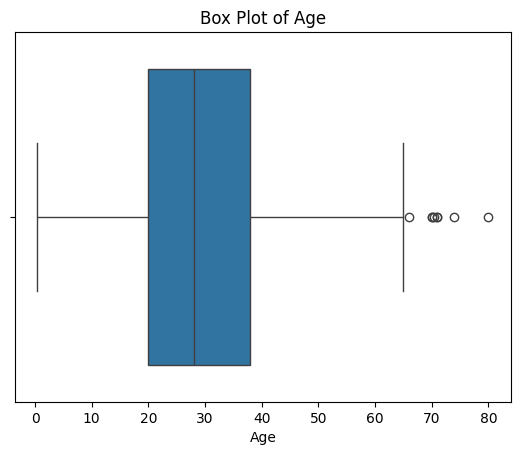

In [32]:
# Create a box plot using seaborn
sns.boxplot(x=titanic_encoded['age'])

# Add title and labels
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.show()

In [33]:
titanic_encoded['age'].mean()

29.64209269662921

In [34]:
titanic_encoded['age'].median()

28.0

### Since there are certain outliers and mean ~= median, we replace nan values in 'age' by median

In [35]:
# Calculate median of 'age' column
median_age = titanic_encoded['age'].median()

# Fill NaN values in 'age' column with median
titanic_encoded['age'].fillna(median_age, inplace=True)

# Count NaN values in each column
nan_counts = titanic_encoded['age'].isna().sum()
print("New count of nan values in age column", nan_counts)

New count of nan values in age column 0


In [36]:
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,gender_male,alone_True,class_encoded,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,1,no,1,False,3,False,False,True
1,1,1,38.0,1,0,71.2833,woman,0,yes,0,False,1,True,False,False
2,1,3,26.0,0,0,7.9250,woman,0,yes,0,True,3,False,False,True
3,1,1,35.0,1,0,53.1000,woman,0,yes,0,False,1,False,False,True
4,0,3,35.0,0,0,8.0500,man,1,no,1,True,3,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,1,no,1,True,2,False,False,True
887,1,1,19.0,0,0,30.0000,woman,0,yes,0,True,1,False,False,True
888,0,3,28.0,1,2,23.4500,woman,0,no,0,False,3,False,False,True
889,1,1,26.0,0,0,30.0000,man,1,yes,1,True,1,True,False,False


### We now drop column 'class_encoded' as 'pclass' is already there.

In [37]:
titanic_encoded.drop(columns = ['class_encoded'], inplace = True)
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,who,adult_male,alive,gender_male,alone_True,embarked_C,embarked_Q,embarked_S
0,0,3,22.0,1,0,7.2500,man,1,no,1,False,False,False,True
1,1,1,38.0,1,0,71.2833,woman,0,yes,0,False,True,False,False
2,1,3,26.0,0,0,7.9250,woman,0,yes,0,True,False,False,True
3,1,1,35.0,1,0,53.1000,woman,0,yes,0,False,False,False,True
4,0,3,35.0,0,0,8.0500,man,1,no,1,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,man,1,no,1,True,False,False,True
887,1,1,19.0,0,0,30.0000,woman,0,yes,0,True,False,False,True
888,0,3,28.0,1,2,23.4500,woman,0,no,0,False,False,False,True
889,1,1,26.0,0,0,30.0000,man,1,yes,1,True,True,False,False


### Encoding 'who' as one hot encoding

In [38]:
# Perform one hot encoding using get_dummies()
titanic_encoded = pd.get_dummies(titanic_encoded, columns=['who'])
titanic_encoded

,survived,pclass,age,sibsp,parch,fare,adult_male,alive,gender_male,alone_True,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,0,3,22.0,1,0,7.2500,1,no,1,False,False,False,True,False,True,False
1,1,1,38.0,1,0,71.2833,0,yes,0,False,True,False,False,False,False,True
2,1,3,26.0,0,0,7.9250,0,yes,0,True,False,False,True,False,False,True
3,1,1,35.0,1,0,53.1000,0,yes,0,False,False,False,True,False,False,True
4,0,3,35.0,0,0,8.0500,1,no,1,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,no,1,True,False,False,True,False,True,False
887,1,1,19.0,0,0,30.0000,0,yes,0,True,False,False,True,False,False,True
888,0,3,28.0,1,2,23.4500,0,no,0,False,False,False,True,False,False,True
889,1,1,26.0,0,0,30.0000,1,yes,1,True,True,False,False,False,True,False


In [39]:
# Count NaN values in each column
nan_counts = titanic_encoded.isna().sum()
print("New count of nan values in age column", nan_counts)

New count of nan values in age column survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
adult_male     0
alive          0
gender_male    0
alone_True     0
embarked_C     0
embarked_Q     0
embarked_S     0
who_child      0
who_man        0
who_woman      0
dtype: int64


In [40]:
y = titanic_encoded['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 889, dtype: int64

In [41]:
titanic_encoded.drop(columns = ['survived', 'alive'], inplace = True)
titanic_encoded

,pclass,age,sibsp,parch,fare,adult_male,gender_male,alone_True,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,1,1,False,False,False,True,False,True,False
1,1,38.0,1,0,71.2833,0,0,False,True,False,False,False,False,True
2,3,26.0,0,0,7.9250,0,0,True,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,0,0,False,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,1,1,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,True,False,False,True,False,True,False
887,1,19.0,0,0,30.0000,0,0,True,False,False,True,False,False,True
888,3,28.0,1,2,23.4500,0,0,False,False,False,True,False,False,True
889,1,26.0,0,0,30.0000,1,1,True,True,False,False,False,True,False


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [48]:
X = titanic_encoded
X

,pclass,age,sibsp,parch,fare,adult_male,gender_male,alone_True,embarked_C,embarked_Q,embarked_S,who_child,who_man,who_woman
0,3,22.0,1,0,7.2500,1,1,False,False,False,True,False,True,False
1,1,38.0,1,0,71.2833,0,0,False,True,False,False,False,False,True
2,3,26.0,0,0,7.9250,0,0,True,False,False,True,False,False,True
3,1,35.0,1,0,53.1000,0,0,False,False,False,True,False,False,True
4,3,35.0,0,0,8.0500,1,1,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,True,False,False,True,False,True,False
887,1,19.0,0,0,30.0000,0,0,True,False,False,True,False,False,True
888,3,28.0,1,2,23.4500,0,0,False,False,False,True,False,False,True
889,1,26.0,0,0,30.0000,1,1,True,True,False,False,False,True,False


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=200)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [52]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [53]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [54]:
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.8146067415730337
Confusion Matrix:
[[90 19]
 [14 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       109
           1       0.74      0.80      0.77        69

    accuracy                           0.81       178
   macro avg       0.80      0.81      0.81       178
weighted avg       0.82      0.81      0.82       178

